<a href="https://www.kaggle.com/code/eliudmunyala/teamkenya-eda?scriptVersionId=104889265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Team Kenya: Kaggle RSNA competition.

## Team Members

```text
1. Munyala Eliud - Team Lead (Data Eng.)
2. Wanjiru Kariuki - MLOps
3. Mukiri Mwirigi - (Blockchain|Crypto|AI)
4. Paul Ndirangu - (MLOps)
5. Ken Kuria - (MLOps)
```

## Task

```text
The task is, based on the input of CT images, to determine whether there are any fractures in 
one of the seven vertebrae that comprise of the cervical spine (C1-C7). 
Fractures in the skull base, thoracic spine, ribs, and clavicles are ignored.
```

# Tools & Libraries:
```text
Includes python libraries and tools(functions, classes)
to help perform repetitive tasks....
````

In [2]:
# libraries
# analysis and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#.......others
import pydicom



In [34]:
import glob
# see every file and folder in the main RSNA folder
file_links = []

for i in glob.glob("../input/rsna-2022-cervical-spine-fracture-detection/*"):
    file_links.append(i)
    
for i in range(len(file_links)):
    print(file_links[i])

../input/rsna-2022-cervical-spine-fracture-detection/sample_submission.csv
../input/rsna-2022-cervical-spine-fracture-detection/train_images
../input/rsna-2022-cervical-spine-fracture-detection/train_bounding_boxes.csv
../input/rsna-2022-cervical-spine-fracture-detection/segmentations
../input/rsna-2022-cervical-spine-fracture-detection/train.csv
../input/rsna-2022-cervical-spine-fracture-detection/test.csv
../input/rsna-2022-cervical-spine-fracture-detection/test_images


# DATA UNDERSTANDING

```text
Will include an overview of the data provided by kaggle
1. Load data
2. view
```

In [4]:
# folder paths
sample_submission = r"../input/rsna-2022-cervical-spine-fracture-detection/sample_submission.csv"

# train datas
train_path = r"../input/rsna-2022-cervical-spine-fracture-detection/train.csv"
train_boundingboxes = r"../input/rsna-2022-cervical-spine-fracture-detection/train_bounding_boxes.csv"

# test data
test_path = r"../input/rsna-2022-cervical-spine-fracture-detection/test.csv"


# ------images
# train
imgs_train_path = r"../input/rsna-2022-cervical-spine-fracture-detection/train_images"


# test
imgs_test_path = r"../input/rsna-2022-cervical-spine-fracture-detection/test_images"

# 
seg_dir_path ="../input/rsna-2022-cervical-spine-fracture-detection/segmentations"

In [46]:
import os
patients = os.listdir(imgs_train_path)
# Big list dont run print.
# print(patients)

In [5]:
# load csv's
df_sample_sub = pd.read_csv(sample_submission)

# train data 
df_train = pd.read_csv(train_path)
df_boundingboxes = pd.read_csv(train_boundingboxes)

# test data
df_test = pd.read_csv(test_path)

In [6]:
# Sample of how we are to submit our data
df_sample_sub

,row_id,fractured
0,1.2.826.0.1.3680043.10197_C1,0.5
1,1.2.826.0.1.3680043.10454_C1,0.5
2,1.2.826.0.1.3680043.10690_C1,0.5


In [7]:
print("\n -------------------------------Dataframe shapes-----------------------------\n")
print('train shape:', df_train.shape)
print('train bbox shape:', df_boundingboxes.shape)
print('test shape:', df_test.shape)


 -------------------------------Dataframe shapes-----------------------------

train shape: (2019, 9)
train bbox shape: (7217, 6)
test shape: (3, 3)


In [8]:
# head
df_train.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [9]:
df_boundingboxes.head()

,StudyInstanceUID,x,y,width,height,slice_number
0,1.2.826.0.1.3680043.10051,219.27715,216.71419,17.30440,20.38517,133
1,1.2.826.0.1.3680043.10051,221.56460,216.71419,17.87844,25.24362,134
2,1.2.826.0.1.3680043.10051,216.82151,221.62546,27.00959,26.37454,135
3,1.2.826.0.1.3680043.10051,214.49455,215.48637,27.92726,37.51363,136
4,1.2.826.0.1.3680043.10051,214.00000,215.48637,27.00000,43.51363,137


In [10]:
df_test.head()

,row_id,StudyInstanceUID,prediction_type
0,1.2.826.0.1.3680043.10197_C1,1.2.826.0.1.3680043.10197,C1
1,1.2.826.0.1.3680043.10454_C1,1.2.826.0.1.3680043.10454,C1
2,1.2.826.0.1.3680043.10690_C1,1.2.826.0.1.3680043.10690,C1


<hr>

```text

train_bounding_boxes.csv - contains bounding boxes of where fractures occured for a subset of the training set.
--------------------------------------------------------------
StudyInstanceUID - The study ID. There is one unique study ID for each patient scan.
x -> x-coordinate of bounding box bottom left corner
y -> y-coordinate of bounding box bottom left corner
width -> width of bounding box
height -> height of bounding box
slice_number -> slice number of scan
```
<hr>

```text
train.csv Metadata for the train test set.
--------------------------------------------------------------
StudyInstanceUID - The study ID. There is one unique study ID for each patient scan.
patient_overall - One of the target columns. The patient level outcome, i.e. if any of the vertebrae are fractured.
C[1-7] - The other target columns. Whether the given vertebrae is fractured. See this diagram for the real location of each vertbrae in the spine.
```
<hr>

```text
test.csv Metadata for the test set prediction structure. Only the first few rows of the test set are available for download.
--------------------------------------------------------------
row_id - The row ID. This will match the same column in the sample submission file.
StudyInstanceUID - The study ID.
prediction_type - Which one of the eight target columns needs a prediction in this row.
```
<hr>

In [11]:
print("\n --------------------------Dataframe dtypes-----------------------------\n")
print('\n========== train datatypes ==========\n', df_train.dtypes,"\n")
print('\n========== train bbox datatypes ==========\n', df_boundingboxes.dtypes,"\n")
print('\n========== test datatypes ==========\n', df_test.dtypes,"\n")


 --------------------------Dataframe dtypes-----------------------------


========== train datatypes ==========
 StudyInstanceUID    object
patient_overall      int64
C1                   int64
C2                   int64
C3                   int64
C4                   int64
C5                   int64
C6                   int64
C7                   int64
dtype: object 


========== train bbox datatypes ==========
 StudyInstanceUID     object
x                   float64
y                   float64
width               float64
height              float64
slice_number          int64
dtype: object 


========== test datatypes ==========
 row_id              object
StudyInstanceUID    object
prediction_type     object
dtype: object 



## EDA

------
- visualizations
    what are we going to visualize?
    
    ## ------------ univariate analysis-----------
    
     #### train data
        - Bar plot of patient_overall - The patient level outcome, i.e. if any of the vertebrae are fractured.
        - Bar plot of  C[1-7] - Whether the given vertebrae is fractured.
     #### test data
        -
        -
    
    ## ------------ Bivariate analysis-----------
    
     #### train data
        - Countplot of fractures by patients
        - Heat map correlation of C[1-7] 
     #### test data
         -
         -
---

(0.0, 1300.0)

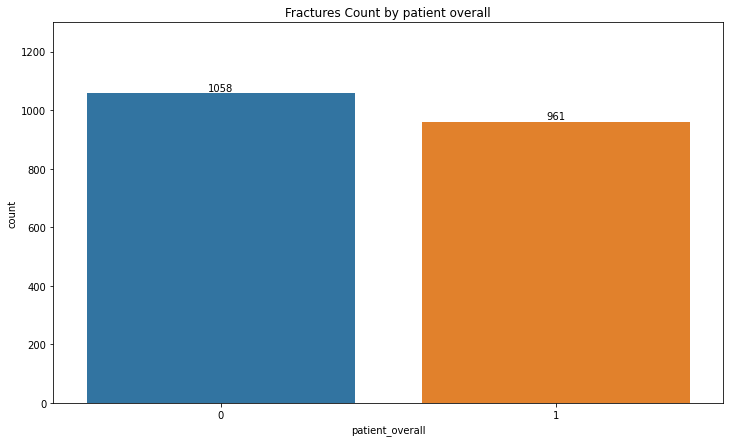

In [12]:
plt.figure(figsize=(12,7))
plt.plot()
ax1 = sns.countplot(data=df_train, x='patient_overall')
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Fractures Count by patient overall')
plt.ylim([0,1300])

In [13]:
df_train['patient_overall'].value_counts()

0    1058
1     961
Name: patient_overall, dtype: int64

In [14]:
# under sample balancing
# class count
class_count_0, class_count_1 = df_train['patient_overall'].value_counts()

# Separate class
class_0 = df_train[df_train['patient_overall'] == 0]
class_1 = df_train[df_train['patient_overall'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1058, 9)
class 1: (961, 9)


total class of 1 and 0:
 0    961
1    961
Name: patient_overall, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

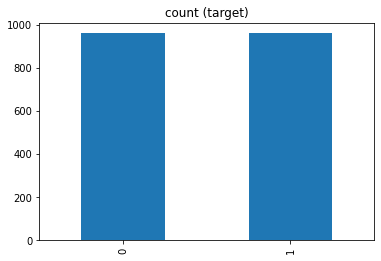

In [15]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['patient_overall'].value_counts())# plot the count after under-sampeling
test_under['patient_overall'].value_counts().plot(kind='bar', title='count (target)')

In [16]:
train_df = test_under.copy()

In [17]:
train_df.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
234,1.2.826.0.1.3680043.27752,0,0,0,0,0,0,0,0
777,1.2.826.0.1.3680043.4216,0,0,0,0,0,0,0,0
769,1.2.826.0.1.3680043.15084,0,0,0,0,0,0,0,0
137,1.2.826.0.1.3680043.3556,0,0,0,0,0,0,0,0
1627,1.2.826.0.1.3680043.2159,0,0,0,0,0,0,0,0


In [18]:
train_df['patient_overall'].value_counts()

0    961
1    961
Name: patient_overall, dtype: int64

(0.0, 2800.0)

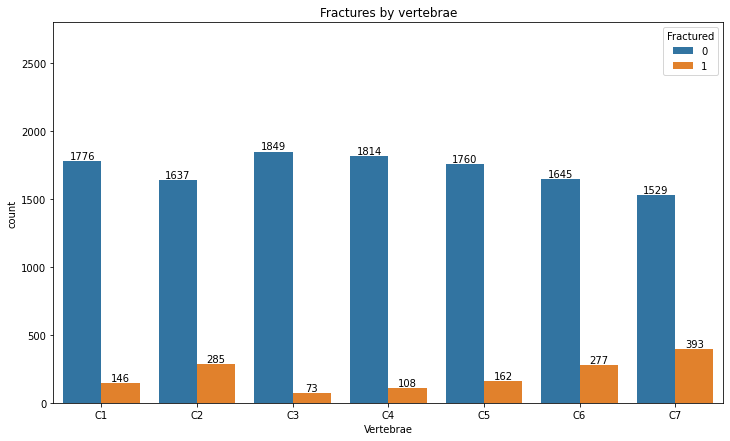

In [19]:
# Unpivot train_df for plotting
train_melt = pd.melt(train_df, id_vars = ['StudyInstanceUID', 'patient_overall'],
             value_vars = ['C1','C2','C3','C4','C5','C6','C7'],
             var_name="Vertebrae",
             value_name="Fractured")
plt.figure(figsize=(12,7))
plt.plot()
ax2 = sns.countplot(data=train_melt, x='Vertebrae', hue='Fractured')
for container in ax2.containers:
    ax2.bar_label(container)
plt.title('Fractures by vertebrae')
plt.ylim([0,2800])

(0.0, 1300.0)

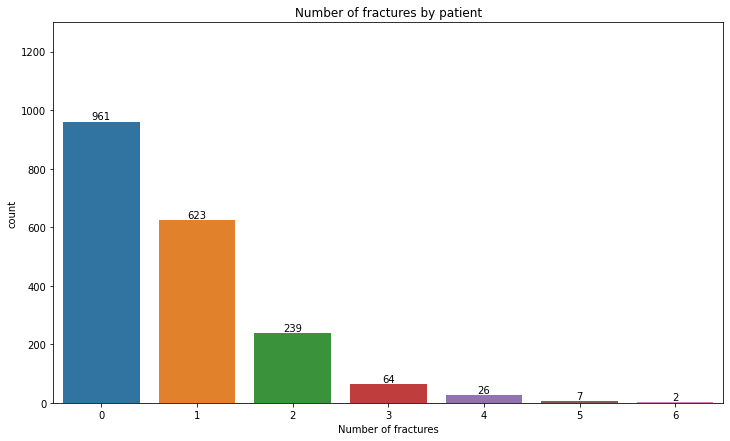

In [20]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x = train_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1))
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of fractures by patient')
plt.xlabel('Number of fractures')
plt.ylim([0,1300])

Text(0.5, 1.0, 'Correlations')

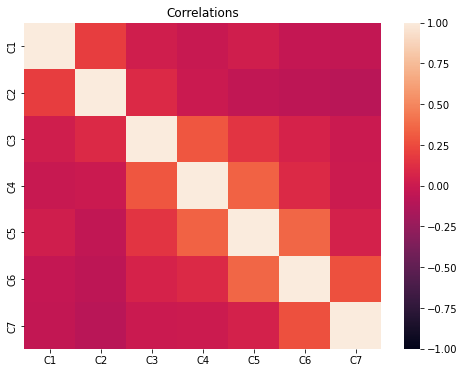

In [21]:
# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(train_df[['C1','C2','C3','C4','C5','C6','C7']].corr(), cmap='rocket', vmin=-1, vmax=1)
plt.title('Correlations')

# IMAGE PRE/PROCESSING

<hr>

### Dicom Files

>A .dcm file follows the Digital Imaging and Communications in Medicine (DICOM) format. It is the standard format used for storing medical images and related metadata. It dates back to 1983, although it has been revised many times.

<hr>


In [22]:
import glob
# see every file and folder in the main RSNA images folder
# run this, pick one sub folder and view whats inside
# for i in glob.glob(imgs_train_path+"/*"):print(i)

dcm_links = []
for i in glob.glob(r"../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/*"):
    dcm_links.append(i)

dcm_links[:3]

['../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/12.dcm',
 '../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/210.dcm',
 '../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/120.dcm']

In [23]:
# test dcm
path_cdm_test = r"../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/120.dcm"
test_ds = pydicom.dcmread(path_cdm_test)
test_ds

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.17625.1.120
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.17625.1.120
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '182656.113783'
(0010, 0010) Patient's Name                      PN: '17625'
(0010, 0020) Patient ID                          LO: '17625'
(0018, 0050) Slice Thickness                     DS: '0.625'
(0020, 000d) Study Instance UID                  UI: 1.2.826

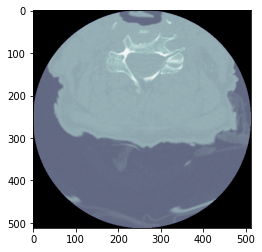

In [61]:
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
path_dcm = r"../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/21.dcm"


ds = pydicom.dcmread(path_dcm)
plt.show()

In [65]:
def load_dicom(path, size = 64):
    try:
        img=dicom.dcmread(path)
        img.PhotometricInterpretation = 'YBR_FULL'
        data=img.pixel_array
        data=data-np.min(data)
        if np.max(data) != 0:
            data=data/np.max(data)
        data=(data*255).astype(np.uint8)        
        return cv2.cvtColor(data.reshape(512, 512), cv2.COLOR_GRAY2RGB)
    except:        
        return np.zeros((512, 512, 3))

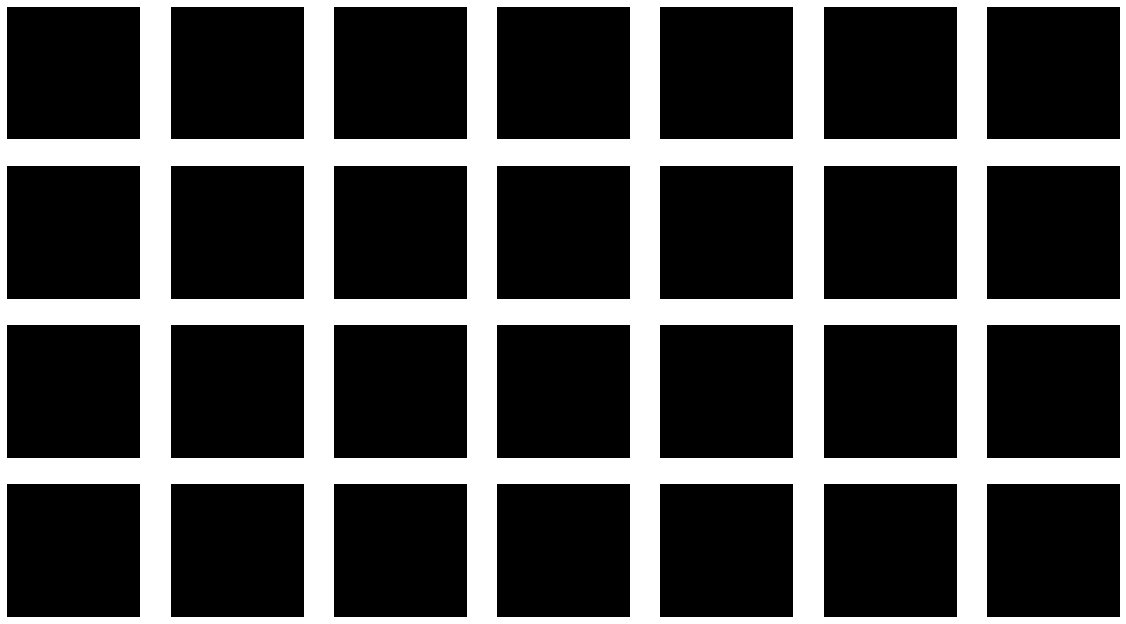

In [70]:
image_file = glob.glob("../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/*.dcm")
plt.figure(figsize=(20, 20))

for i in range(28):
    ax = plt.subplot(7, 7, i + 1)
    image_path = image_file[i]
    image = load_dicom(image_path)
    plt.axis('off')   
    plt.imshow(image)

# MODEL CREATION.

## MODEL SELECTION

```text
Pick best of three
```

# RESEARCH.



> Research blog links

>---

[EDA image classification_1](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2#:~:text=Exploratory%20data%20analysis%20comprises%20of,of%20predictors%20across%20different%20classes.)
<br>
[EDA image classification_2](https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a)
<br>
[EDA for images kaggle](https://www.kaggle.com/code/jpmiller/basic-eda-with-images)
<br>
[image-classification-tips-and-tricks-from-13-kaggle-competitions](https://neptune.ai/blog/image-classification-tips-and-tricks-from-13-kaggle-competitions)